Y-DATA 2020/21<br/>
Deep Learning HW3<br/>
Serge Tochilov

# Convolutional Neural Networks: Step by Step
Exercise credit: [DeepLearning.ai](https://www.coursera.org/learn/convolutional-neural-networks)

In this assignment, you will implement convolutional (CONV) and pooling (POOL) layers in numpy, including both forward propagation and backward propagation.

**Notation**:
- Superscript $[l]$ denotes an object of the $l^{th}$ layer. 
    - Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.


- Superscript $(i)$ denotes an object from the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example input.
    
    
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$, assuming this is a fully connected (FC) layer.

    
- $n_H$, $n_W$ and $n_C$ denote respectively the height, width and number of channels of a given layer. If you want to reference a specific layer $l$, you can also write $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$ and $n_{C_{prev}}$ denote respectively the height, width and number of channels of the previous layer. If referencing a specific layer $l$, this could also be denoted $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 

## 1. Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- `np.random.seed(1)` is used to keep all the random function calls consistent. It will help us grade your work.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# set default size of plots
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

## 2. Outline of the Assignment

You will be implementing the building blocks of a convolutional neural network! Each function you will implement will have detailed instructions that will walk you through the steps needed:

- Convolution functions, including:
    - zero padding
    - convolve window 
    - convolution forward
    - convolution backward (optional)
- Pooling functions, including:
    - pooling forward
    - create mask 
    - distribute value
    - pooling backward (optional)
    
This notebook will ask you to implement these functions from scratch in `numpy` to build the following model:
<!---
<img src="images/model.png" style="width:800px;height:300px;">
-->
<center>
<img src='https://drive.google.com/uc?export=download&id=1j1wiGMfv0WgyVDOsOULjOsuKyidNS0Qs' style='width:800px;height:300px;'></center>

**Note** that for every forward function, there is its corresponding backward equivalent. Hence, at every step of your forward module you will store some parameters in a cache. These parameters are used to compute gradients during backpropagation. 

## 3. Convolutional Neural Networks

Although programming frameworks make convolutions easy to use, they remain one of the hardest concepts to understand in Deep Learning. A convolution layer transforms an input volume into an output volume of different size, as shown below. 
<!---
<img src="images/conv_nn.png" style="width:350px;height:200px;">
--->
<center>
<img src='https://drive.google.com/uc?export=download&id=1zysjqvLEBDOPJ8UqlsnnqypXgsP4mDBx' style='width:350px;height:200px;'></center>

In this part, you will build every step of the convolution layer. You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself. 

### 3.1. Zero-padding

Zero-padding adds zeros around the border of an image:
<!---
<img src="images/PAD.png" style="width:600px;height:400px;">
--->
<center>
<img src='https://drive.google.com/uc?export=download&id=1LgqLCwO5NWvAcvtuDGvMDShcxdYdZSSa' style="width:600px;height:400px;">
<br>
<b>Zero-Padding</b> image ($3$ channels, RGB) with a padding of $2$. </center>

The main benefits of padding are the following:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer. 

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

**Exercise**: Implement the following function, which pads all the images of a batch of examples X with zeros. [Use np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html).

**Note** if you want to pad the array `a` of shape `(5,5,5,5,5)` with `pad=1` for the second dimension, `pad=3` for the fourth dimension and `pad=0` for the rest, you would do:
```python
a = np.pad(a, ((0, 0), (1, 1), (0, 0), (3, 3), (0, 0)), mode='constant', constant_values=(... , ...))
```

In [ ]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    '''
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated by ZeroPadding image.
    
    Argument:
        X -- numpy array of shape (m, n_H, n_W, n_C) representing a batch of `m` images
        pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
        X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) '''
    
    ### START CODE HERE ### (~1 line)
    X_pad = np.pad(X, ((0,), (pad,), (pad,), (0,)), mode='constant', constant_values=(0, 0))
    ### END CODE HERE ###
    
    return X_pad

x.shape =
(4, 3, 3, 2)
x_pad.shape =
(4, 7, 7, 2)
x[1, 1] =
[[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1, 1] =
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]



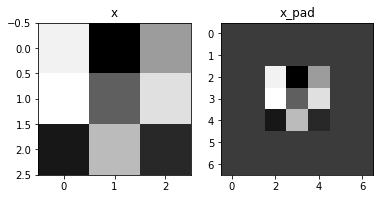

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)

print(f'x.shape =\n{x.shape}')
print(f'x_pad.shape =\n{x_pad.shape}')
print(f'x[1, 1] =\n{x[1, 1]}')
print(f'x_pad[1, 1] =\n{x_pad[1, 1]}')
print()

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.set_title('x')
ax0.imshow(x[0, :, :, 0])
ax1.set_title('x_pad')
ax1.imshow(x_pad[0, :, :, 0])
plt.show()

**Expected Output**:

    x.shape =
    (4, 3, 3, 2)
    x_pad.shape =
    (4, 7, 7, 2)
    x[1, 1] =
    [[ 0.90085595 -0.68372786]
     [-0.12289023 -0.93576943]
     [-0.26788808  0.53035547]]
    x_pad[1, 1] =
    [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]

### 3.2. Single step of convolution 

In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which: 

- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)

<!---
<img src="images/Convolution_schematic.gif" style="width:500px;height:300px;">
-->
<center>
<img src='https://drive.google.com/uc?export=download&id=1x1fFSq2tbO6lIHTvKvmQjyfwCgnbt_5y' style='width:500px;height:300px;'>
<br>
<b>Convolution operation</b> with a filter of 2x2 and a stride of 1 (stride = amount you move the window each time you slide) </center>

In a computer vision application, each value in the matrix on the left corresponds to a single pixel value, and we convolve a $3\times3$ filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias. In this first step of the exercise, you will implement a single step of convolution, corresponding to applying a filter to just one of the positions to get a single real-valued output. 

Later in this notebook, you'll apply this function to multiple positions of the input to implement the full convolutional operation. 

**Exercise**: Implement `conv_single_step()`. [Hint](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).


In [ ]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of
    the output activation of the previous layer.
    
    Arguments:
        a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
        W -- weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
        b -- bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
        Z -- scalar value, result of convolving the sliding window (W, b) on
            slice a_slice_prev of the input data '''

    ### START CODE HERE ### (~2 lines of code)

    # element-wise product between a_slice_prev and W;
    # do not add the bias yet; sum over all entries of the volume
    Z = np.sum(a_slice_prev * W)

    # add bias b to Z;
    # cast b to a float() so that Z results in a scalar value
    Z = Z + np.squeeze(b)[()]

    ### END CODE HERE ###

    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print(f'Z = {Z:.11f}')

Z = -6.99908945068


**Expected Output**:

    Z = -6.99908945068

### 3.3. Convolutional Neural Networks - Forward pass

In the forward pass, you will take many filters and convolve them on the input. Convolution from each filter gives you a 2D matrix output. You will then stack these outputs to get a 3D volume: 
<!---
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
-->

In [ ]:
%%HTML
<video width='960' height='600' controls>
  <source src='https://drive.google.com/uc?export=download&id=1U0sCszLCGyWvrVJ5N5lcKpO7MNJ-_6Ml' type='video/mp4'>
</video>

**Exercise**: Implement the function below to convolve the filters `W` on an input activation `A_prev`. This function takes as input `A_prev`, the activations output by the previous layer (for a batch of `m` inputs), `f` filters/weights denoted by `W`, and a bias vector denoted by `b`, where each filter has its own (single) bias. Finally you also have access to the hyperparameters dictionary which contains the stride and the padding. 

**Hints**: 
 - To select a $2\times2$ slice at the upper left corner of a matrix `a_prev` (with shape `(5,5,3)`), you would do:
```python
a_slice_prev = a_prev[:2, :2, :]
```
This will be useful when you will define `a_slice_prev` below, using the `start/end` indexes you will define.

- To define `a_slice` you will need to first define its corners `vert_start`, `vert_end`, `horiz_start` and `horiz_end`. This figure may be helpful for you to find how each of the corner can be defined using `h`, `w`, `f` and `s` in the code below.

<!---
<img src="images/vert_horiz_kiank.png" style="width:400px;height:300px;">
-->
<center><img src='https://drive.google.com/uc?export=download&id=19J_9s_vZRIZmCXjUauvKBYjpdF5x1C8m' style='width:400px;height:300px;'>
<b>Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)</b><br>
This figure shows only a single channel.</center>

**Reminder**:
The formulas relating the output shape of the convolution to the input shape is:

$$
\begin{align}n_H &= \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 \\
n_W &= \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 \\
n_C &= \text{number of filters used in the convolution}
\end{align}$$

For this exercise, we won't worry about vectorization, and will just implement everything with `for`-loops.

In [ ]:
# HELPER FUNCTION: out_dim

# computes output dimension using the formula above
def out_dim(dim, stride, pad, f=2):
    return (dim - f + 2*pad) // stride + 1

In [ ]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    '''
    Implements the forward propagation for a convolution function
    
    Arguments:
        A_prev -- output activations of the previous layer,
            numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
        W -- weights, numpy array of shape (f, f, n_C_prev, n_C)
        b -- biases, numpy array of shape (1, 1, 1, n_C)
        hparameters -- dictionary containing 'stride' and 'pad'
        
    Returns:
        Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache of values needed for the conv_backward() function '''
    
    ### START CODE HERE ###
    # retrieve dimensions from A_prev's shape (~1 line)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape

    # retrieve dimensions from W's shape (~1 line)
    f, _, n_C_prev, n_C = W.shape

    # retrieve information from hparameters (~2 lines)
    stride, pad = list(map(hparameters.get, ('stride', 'pad')))

    # compute the dimensions of the CONV output volume using the formula given above;
    # hint: use int() to floor (~2 lines)
    n_H = out_dim(n_H_prev, stride, pad)
    n_W = out_dim(n_W_prev, stride, pad)

    # initialize the output volume Z with zeros (~1 line)
    Z = np.zeros((m, n_H, n_W, n_C))

    # create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    # loop over the batch of training examples
    for i in range(m):

        # loop over vertical axis of the output volume
        for h in range(n_H):

            # loop over horizontal axis of the output volume
            for w in range(n_W):

                # find the corners of the current slice (~4 lines)
                h_s, w_s = h * stride, w * stride 
                h_e, w_e = h_s + f, w_s + f

                # use the corners to define the 3D-slice of a_prev_pad
                # (see "Hints" above) (~1 line)
                a_slice_prev = A_prev_pad[i, h_s:h_e, w_s:w_e]

                # loop over channels (= #filters) of the output volume
                for c in range(n_C):

                    # convolve the 3D-slice with the correct filter W and bias b
                    # to get back one output neuron (~1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

    ### END CODE HERE ###

    # making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # save information in `cache` for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {'pad': 2, 'stride': 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print(f'Z\'s mean = {np.mean(Z):.13f}')
print('Z[3, 2, 1] =\n', Z[3, 2, 1])
print('cache_conv[0][1][2][3] =', cache_conv[0][1][2][3])

Z's mean = 0.0489952035289
Z[3, 2, 1] =
 [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


**Expected Output**:

    Z's mean = 0.0489952035289
    Z[3, 2, 1] =
     [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
      5.18531798  8.75898442]
    cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


Finally, CONV layer should also contain an activation, in which case we would add the following line of code:

```python
# convolve the window to get back one output neuron
Z[i, h, w, c] = ...

# apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```

You don't need to do it here. 


## 4. Pooling layer 

The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are: 

- Max-pooling layer: slides an $(f, f)$ window over the input and stores the max value of the window in the output.

- Average-pooling layer: slides an $(f, f)$ window over the input and stores the average value of the window in the output.

<center><table><td>
<!---
<img src="images/max_pool1.png" style="width:500px;height:300px;">
-->
<img src='https://drive.google.com/uc?export=download&id=1Gpzfb50Lw9JlV8E6X8WVSZ9HUh4cSTFm' style='width:500px;height:300px;'></td><td>
<!---
<img src="images/a_pool.png" style="width:500px;height:300px;">
-->
<img src='https://drive.google.com/uc?export=download&id=1zHsKOghmAGOkqBknqVolkJk6Zlk8sGoc' style='width:500px;height:300px;'></td></table></center>

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f\times f$ window you would compute a max or average over. 


### 4.1. Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function. 

**Exercise**: Implement the forward pass of the pooling layer. Follow the hints in the comments below.

**Reminder**:
As there's no padding, the formulas binding the output shape of the pooling to the input shape is:

$$\begin{align}
n_H &= \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 \\
n_W &= \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 \\
n_C &= n_{C_{prev}}
\end{align}$$

In [ ]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode='max'):
    '''
    Implements the forward pass of the pooling layer
    
    Arguments:
        A_prev -- input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
        hparameters -- dictionary containing 'f' and 'stride'
        mode -- the pooling mode you would like to use, defined as a string ('max' or 'average')
    
    Returns:
        A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache used in the backward pass of the pooling layer,
            contains the input and hparameters '''
    
    # retrieve dimensions from the input shape
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    
    # retrieve hyperparameters from `hparameters`
    f, stride = list(map(hparameters.get, ('f', 'stride')))
    
    # define the dimensions of the output
    n_H = out_dim(n_H_prev, stride, 0, f=f)
    n_W = out_dim(n_W_prev, stride, 0, f=f)
    n_C = n_C_prev
    
    # initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###

    # loop over the training examples
    for i in range(m):

        # loop on the vertical axis of the output volume
        for h in range(n_H):

            # loop on the horizontal axis of the output volume
            for w in range(n_W):

                # find the corners of the current slice (~4 lines)
                h_s, w_s = h * stride, w * stride 
                h_e, w_e = h_s + f, w_s + f

                # loop over the channels of the output volume
                for c in range (n_C):
                    
                    # use the corners to define the current slice on the i-th training
                    # example of A_prev, channel c (~1 line)
                    a_slice_prev = A_prev[i, h_s:h_e, w_s:w_e, c]

                    # compute the pooling operation on the slice; use an `if` statment
                    # to differentiate the modes and np.max/np.mean
                    if mode == 'max':
                        A[i, h, w, c] = np.max(a_slice_prev)
                    elif mode == 'average':
                        A[i, h, w, c] = np.mean(a_slice_prev)
                    else:
                        raise ValueError(f'Pooling mode \'{mode}\' is not supported')

    ### END CODE HERE ###
    
    # store the input and hparameters in `cache` for pool_backward()
    cache = (A_prev, hparameters)
    
    # making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {'stride': 2, 'f': 3}

A, cache = pool_forward(A_prev, hparameters)
print('mode: \'max\'')
print(f'A =\n{A}\n')

A, cache = pool_forward(A_prev, hparameters, mode='average')
print('mode: \'average\'')
print(f'A =\n{A}\n')

mode: 'max'
A =
[[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]

mode: 'average'
A =
[[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]



**Expected Output:**

    mode: 'max'
    A =
    [[[[1.74481176 0.86540763 1.13376944]]]

     [[[1.13162939 1.51981682 2.18557541]]]]

    mode: 'average'
    A =
    [[[[ 0.02105773 -0.20328806 -0.40389855]]]

     [[[-0.22154621  0.51716526  0.48155844]]]]

Congratulations! You have now implemented the forward passes of all the layers of a convolutional network. 
